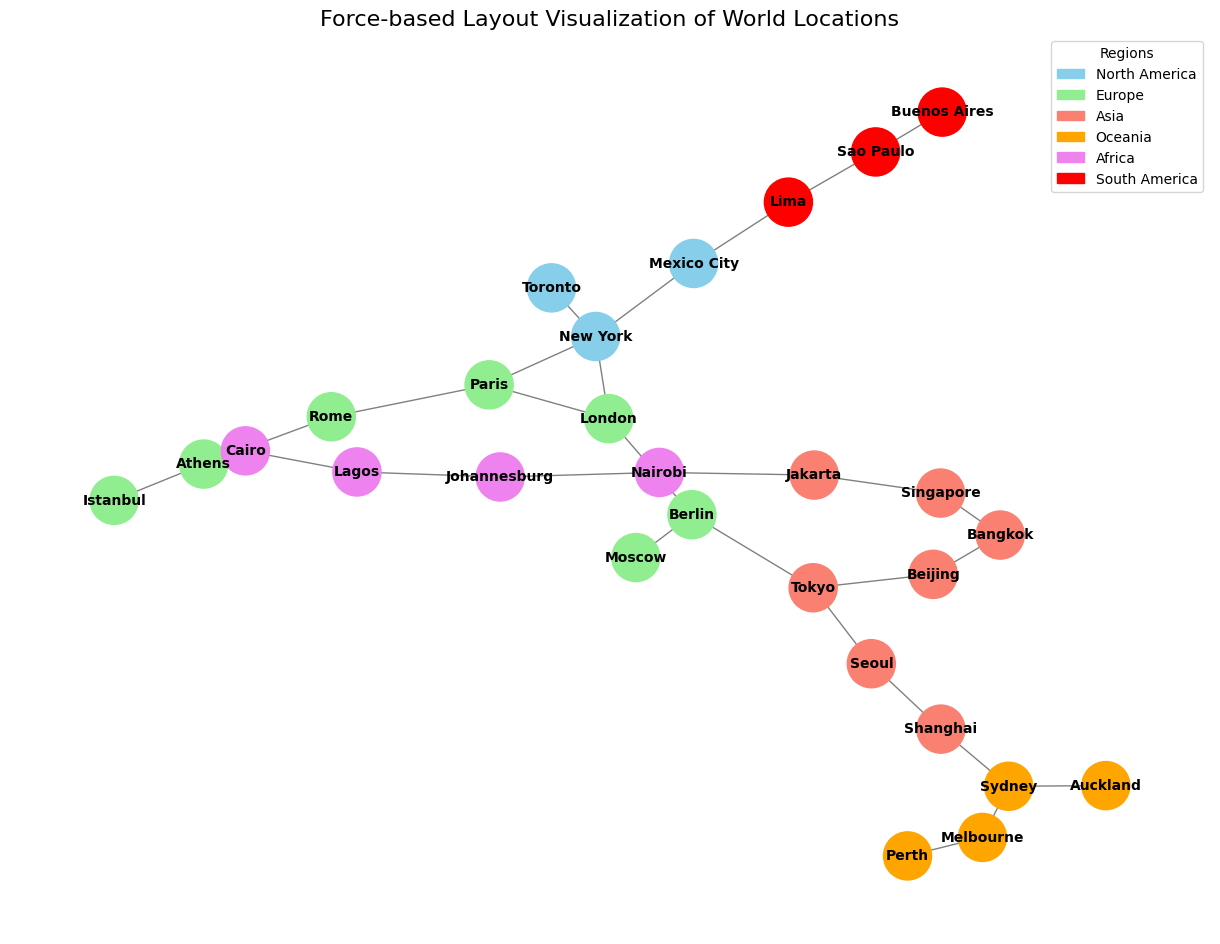

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# ---- Step 1: Create a complex dataset with world locations ----
edges = [
    ("New York", "London"), ("New York", "Toronto"), ("New York", "Mexico City"),
    ("London", "Paris"), ("London", "Berlin"), ("Paris", "Rome"),
    ("Berlin", "Moscow"), ("Rome", "Athens"), ("Athens", "Istanbul"),
    ("Tokyo", "Seoul"), ("Tokyo", "Beijing"), ("Seoul", "Shanghai"),
    ("Beijing", "Bangkok"), ("Bangkok", "Singapore"), ("Singapore", "Jakarta"),
    ("Sydney", "Melbourne"), ("Sydney", "Auckland"), ("Melbourne", "Perth"),
    ("Cairo", "Lagos"), ("Lagos", "Johannesburg"), ("Johannesburg", "Nairobi"),
    ("Mexico City", "Lima"), ("Lima", "Sao Paulo"), ("Sao Paulo", "Buenos Aires"),
    ("Paris", "New York"), ("Berlin", "Tokyo"), ("Athens", "Cairo"),
    ("Shanghai", "Sydney"), ("Nairobi", "Jakarta")
]

# Define groups by continent/region for coloring
groups = {
    "North America": {"New York", "Toronto", "Mexico City"},
    "Europe": {"London", "Paris", "Berlin", "Rome", "Moscow", "Athens", "Istanbul"},
    "Asia": {"Tokyo", "Seoul", "Beijing", "Shanghai", "Bangkok", "Singapore", "Jakarta"},
    "Oceania": {"Sydney", "Melbourne", "Auckland", "Perth"},
    "Africa": {"Cairo", "Lagos", "Johannesburg", "Nairobi"},
    "South America": {"Lima", "Sao Paulo", "Buenos Aires"}
}

# Color palette for groups
colors = ["skyblue", "lightgreen", "salmon", "orange", "violet", "red"]
color_map = {}

for i, (group, nodes) in enumerate(groups.items()):
    for node in nodes:
        color_map[node] = colors[i]

# ---- Step 2: Create Graph ----
G = nx.Graph()
G.add_edges_from(edges)

# ---- Step 3: Compute Force-based Layout ----
pos = nx.spring_layout(G, seed=42)

# ---- Step 4: Visualize the Graph with node colors ----
plt.figure(figsize=(12, 9))

node_colors = [color_map.get(node, "gray") for node in G.nodes()]

nx.draw(G, pos, with_labels=True,
        node_color=node_colors,
        node_size=1200,
        font_size=10,
        font_weight='bold',
        edge_color='gray')

# Legend
import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=colors[i], label=group) for i, group in enumerate(groups)]
plt.legend(handles=legend_handles, title="Regions", loc='best')

plt.title("Force-based Layout Visualization of World Locations", fontsize=16)
plt.show()
